# 笔记

In [4]:
# 导入数据
import pandas as pd
path = 'automobileEDA.csv'
df = pd.read_csv(path)

In [5]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


- 导入回归计算模块

In [17]:
from sklearn.linear_model import LinearRegression

## 回归计算

In [18]:
lm = LinearRegression()

In [19]:
lm

LinearRegression()

- 设定x，y

In [22]:
X =df[['highway-mpg']]
Y = df['price']

In [24]:
type(X)

pandas.core.frame.DataFrame

In [25]:
type(Y)

pandas.core.series.Series

- 进行拟合

In [23]:
lm.fit(X,Y)

LinearRegression()

<kbd>注</kbd>:经过实验，拟合函数的X只接受数据框类型，y只接受serise类型

In [26]:
hat = lm.predict(X)
hat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

- 计算截距

In [28]:
lm.intercept_

38423.305858157386

- 计算斜率

In [29]:
lm.coef_

array([-821.73337832])

- 得出回归模型

In [43]:
Yhat = -821.73*X + 38423.30

## 多变量回归计算

In [34]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [36]:
lm.fit(Z,df['price'])

LinearRegression()

In [37]:
lm.intercept_

-15806.624626329223

In [39]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [47]:
# 得出多变量回归计算模型
X_1=df['horsepower']
X_2=df['curb-weight']
X_3=df['engine-size']
X_4=df['highway-mpg']
Yhat1 = 53.49574423*X_1 +4.70770099*X_2+81.53026382*X_3+36.05748882*X_4-15806.624626329223
#Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

## 散点图

In [3]:
#导入绘图模块
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

(0.0, 48178.03704263739)

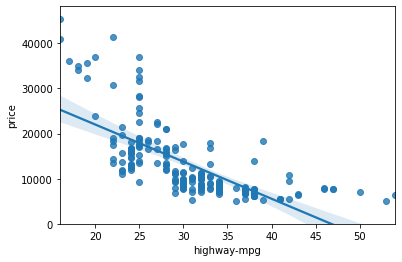

In [12]:
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,) #这个函数是限制 y 的绘图下限的

## 残差图

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

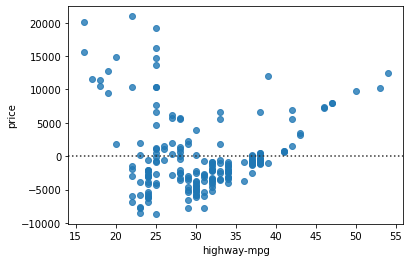

In [56]:
sns.residplot(x=df['highway-mpg'],y=df['price'])

<AxesSubplot:ylabel='price'>

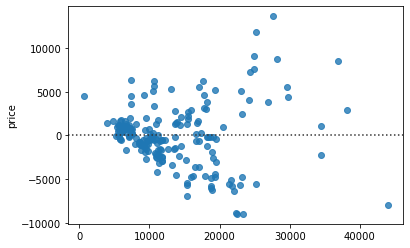

In [55]:
sns.residplot(x=Yhat1,y=df['price'])

## 分布图

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<AxesSubplot:xlabel='price', ylabel='Density'>

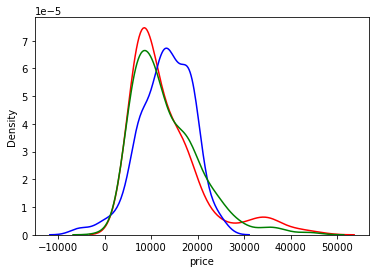

In [48]:
# 实际值分布
axl  =sns.distplot(df['price'],hist = False,color='r',label='Actual Value')
# 预测图分布
sns.distplot(Yhat,hist=False,color='b',label='fitted Values',ax=axl)
sns.distplot(Yhat1,hist=False,color='g',label='fitted Values2',ax=axl)

## 高阶单变量回归

In [83]:
# 导入numpy计算模块
import numpy as np

In [80]:
# 定义数据
x =df['highway-mpg']
y = df['price']

In [84]:
# 使用拟合函数
f = np.polyfit(x,y,3) # 拟合函数,得到是一个数组
p = np.poly1d(f) # 表示函数，得到的是一个可以输入、输出的函数
print(p)
print(f)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05
[-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05]


## 高阶多变量回归

In [97]:
# 导入计算模块
from sklearn.preprocessing import PolynomialFeatures

In [98]:
# 建立高阶多变量回归模型
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [99]:
Z_pr = pr.fit_transform(Z)

In [100]:
Z.shape

(201, 4)

In [111]:
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
196,114.0,2952,141,28
197,160.0,3049,141,25
198,134.0,3012,173,23
199,106.0,3217,145,27


In [103]:
Z_pr.shape

(201, 15)

## 管道

In [104]:
# 导入模块
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [105]:
# 创建输入端
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

<kbd>注</kbd>:看了视频，大概明白，这是用来标准化输出的，所生成的list里的tuple，第一个是模块名，第二个是处理方法

In [107]:
# 输入管道
Pipe = Pipeline(Input)
Pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [108]:
Pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [110]:
ypipe=Pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

## 样本准确性估计

总的来说，两个指标：
1. MSE (Mean Squared Error)(平均方差）
2.R-squared（R方）

#### 1. MSE

In [112]:
# 导入计算模块
from sklearn.metrics import mean_squared_error

In [115]:
mean_squared_error(df['price'],ypipe)
# 前一个参数输入观测值，后一个参数输入预测值

9656613.4039896

#### 2. R-squared

In [120]:
X=df[['highway-mpg']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)   # 千万记住，x的输入是数据框！

LinearRegression()

In [121]:
lm.score(X,Y)

0.4965911884339175

## 预测与决策

In [122]:
# 导入绘画模块
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)
new_input # 这是生成数组

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],

In [125]:
lm.fit(X,Y)
lm

LinearRegression()

In [126]:
yhat_fin = lm.predict(new_input)

In [127]:
print(yhat_fin)

[ 37601.57247984  36779.83910151  35958.10572319  35136.37234487
  34314.63896655  33492.90558823  32671.1722099   31849.43883158
  31027.70545326  30205.97207494  29384.23869662  28562.50531829
  27740.77193997  26919.03856165  26097.30518333  25275.57180501
  24453.83842668  23632.10504836  22810.37167004  21988.63829172
  21166.9049134   20345.17153508  19523.43815675  18701.70477843
  17879.97140011  17058.23802179  16236.50464347  15414.77126514
  14593.03788682  13771.3045085   12949.57113018  12127.83775186
  11306.10437353  10484.37099521   9662.63761689   8840.90423857
   8019.17086025   7197.43748192   6375.7041036    5553.97072528
   4732.23734696   3910.50396864   3088.77059031   2267.03721199
   1445.30383367    623.57045535   -198.16292297  -1019.8963013
  -1841.62967962  -2663.36305794  -3485.09643626  -4306.82981458
  -5128.5631929   -5950.29657123  -6772.02994955  -7593.76332787
  -8415.49670619  -9237.23008451 -10058.96346284 -10880.69684116
 -11702.43021948 -12524.16

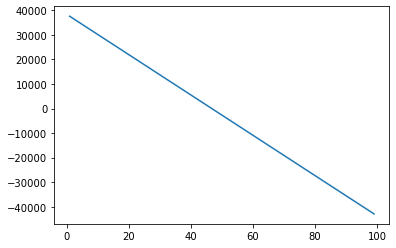

In [128]:
plt.plot(new_input,yhat_fin)